In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [79]:
age=[25,35,15,20,0,0]

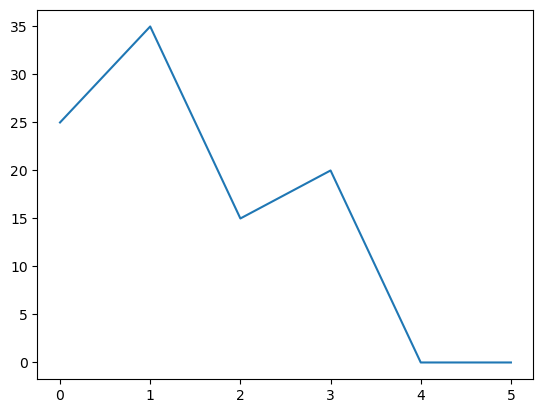

In [80]:
plt.plot(age) # slightly right skewed

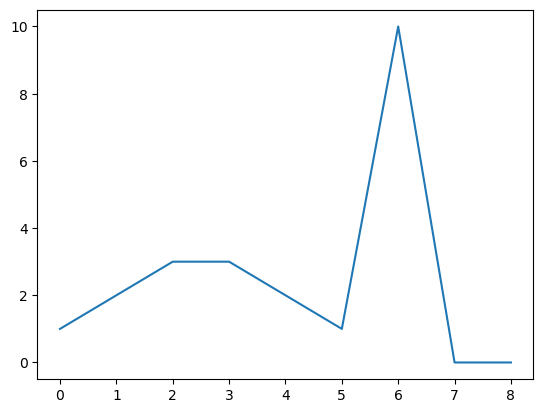

In [81]:
a=[1,2,3,3,2,1,10,0,0]
plt.plot(a)

# we can use pandas as scikit learn 

# manual demo using pandas fillna()

In [82]:
# simple to use not good at production 

In [101]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [102]:
df=pd.read_csv("C:\\Users\\Admin\\OneDrive\\Desktop\\DS_Resources\\ml_campus_x\\100-days-of-machine-learning\\day36-imputing-numerical-data\\titanic_toy.csv")

In [103]:
df.sample(10)

,Age,Fare,Family,Survived
690,31.0,57.0000,1,1
588,22.0,8.0500,0,0
294,24.0,7.8958,0,0
345,24.0,13.0000,0,1
58,5.0,27.7500,3,1
414,44.0,7.9250,0,1
495,NaN,14.4583,0,0
576,34.0,13.0000,0,1
562,28.0,NaN,0,0
756,28.0,7.7958,0,0


In [104]:
len(df)

891

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [106]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

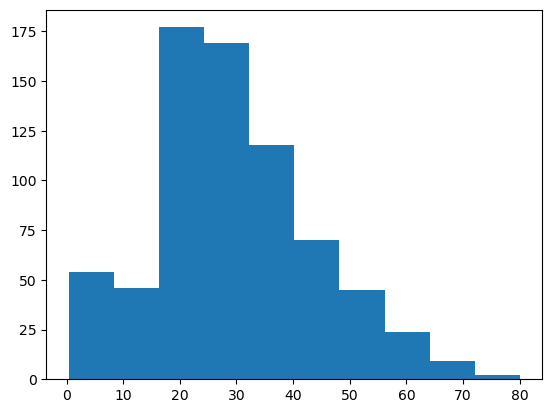

In [107]:
plt.hist(df['Age'])

In [108]:
df['Age'].isnull().sum()

np.int64(177)

(array([696., 101.,  27.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

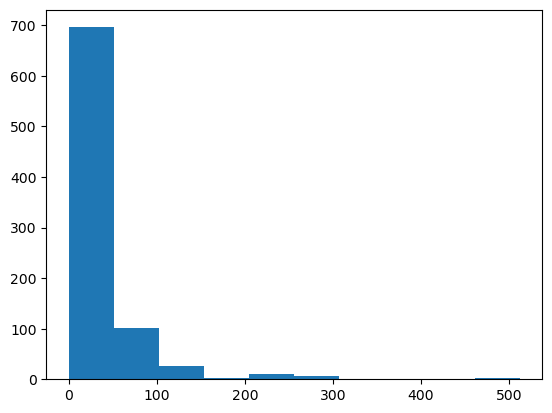

In [109]:
plt.hist(df['Fare'])

# both age and fare has missing values and the distribution are skewed

In [110]:
#apply pandas fillna() cuz we r using inbuilt func here for demo

In [111]:
df['new_Age']=df['Age'].fillna(df['Age'].median())

In [112]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
new_Age       0
dtype: int64

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

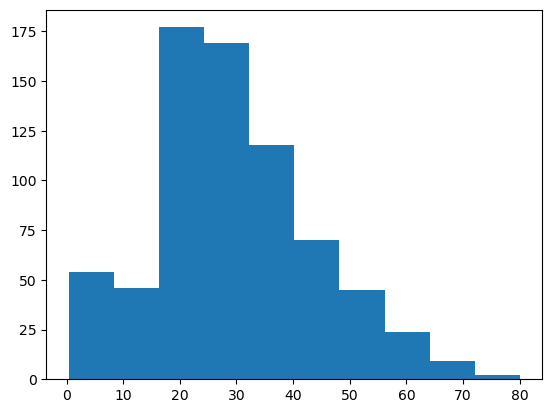

In [113]:
plt.hist(df['Age'])

In [114]:
# distribution has changed and covariange also changed[after applying fillna to age]

In [115]:
df['new_Fare'] =df['Fare']=df['Fare'].fillna(df['Fare'].median())

In [116]:
df.isnull().sum() 

Age         177
Fare          0
Family        0
Survived      0
new_Age       0
new_Fare      0
dtype: int64

(array([741., 101.,  27.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

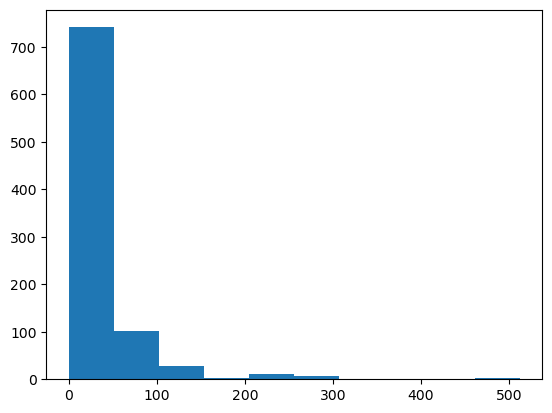

In [117]:
plt.hist(df['Fare'])

<Axes: >

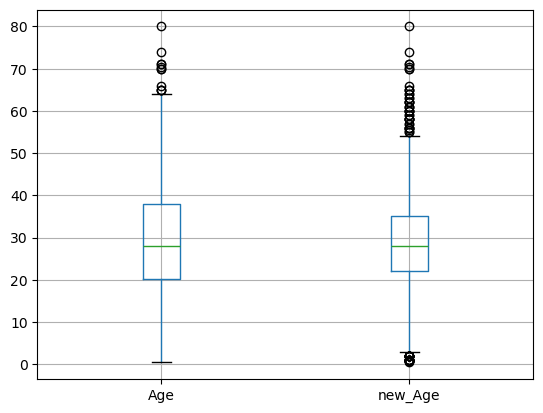

In [125]:
df[['Age','new_Age']].boxplot()

# a lot Outliers after fillna

<Axes: >

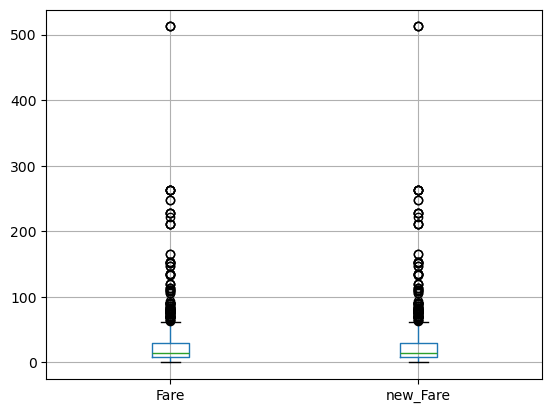

In [127]:
df[['Fare','new_Fare']].boxplot()

## USING PANDAS

In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [129]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [130]:
df=pd.read_csv("C:\\Users\\Admin\\OneDrive\\Desktop\\DS_Resources\\ml_campus_x\\100-days-of-machine-learning\\day36-imputing-numerical-data\\titanic_toy.csv")

In [131]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [132]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [133]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [134]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

X_train['Fare_999'] = X_train['Fare'].fillna(999)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

In [135]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after 99 wala imputation: ', X_train['Age_99'].var())
print('Age Variance after -1 wala imputation: ', X_train['Age_minus1'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after 999 wala imputation: ', X_train['Fare_999'].var())
print('Fare Variance after -1 wala imputation: ', X_train['Fare_minus1'].var())

Original Age variable variance:  204.3495133904614
Age Variance after 99 wala imputation:  951.7275570187172
Age Variance after -1 wala imputation:  318.0896202624484
Original Fare variable variance:  2448.197913706318
Fare Variance after 999 wala imputation:  47219.20265217623
Fare Variance after -1 wala imputation:  2378.5676784883503


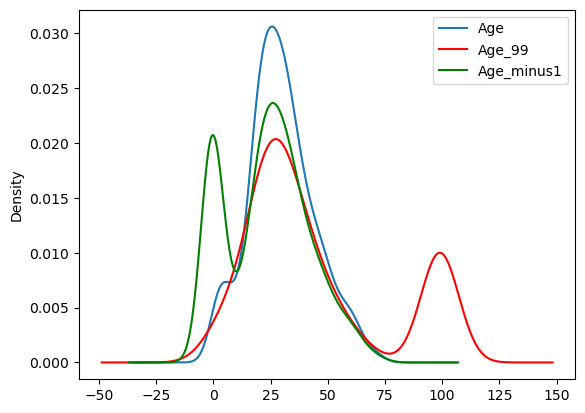

In [136]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Age_99'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Age_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

# shape has changed

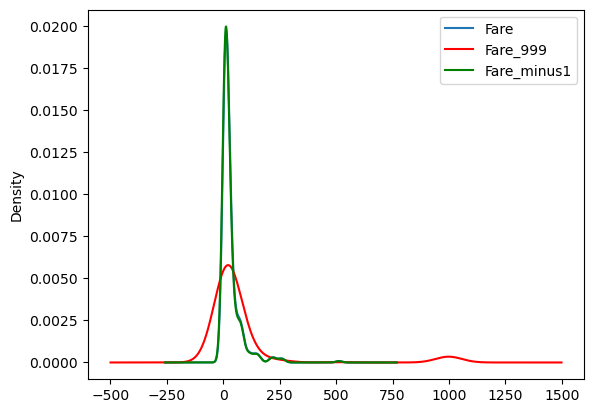

In [137]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
X_train['Fare_999'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
X_train['Fare_minus1'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [138]:
X_train.cov()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,162.793430,63.321188
Fare,70.719262,2448.197914,17.258917,-101.671097,125.558364,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-7.387287,-4.149246,11.528625,16.553989
Age_99,204.349513,-101.671097,-7.387287,951.727557,-189.535540,-159.931663,-94.317400
Age_minus1,204.349513,125.558364,-4.149246,-189.535540,318.089620,257.379887,114.394141
Fare_999,162.793430,2448.197914,11.528625,-159.931663,257.379887,47219.202652,762.474982
Fare_minus1,63.321188,2448.197914,16.553989,-94.317400,114.394141,762.474982,2378.567678


In [139]:
X_train.corr()

,Age,Fare,Family,Age_99,Age_minus1,Fare_999,Fare_minus1
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.051179,0.084585
Fare,0.092644,1.000000,0.208268,-0.066273,0.142022,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.144787,-0.140668,0.032079,0.205233
Age_99,1.000000,-0.066273,-0.144787,1.000000,-0.344476,-0.023857,-0.062687
Age_minus1,1.000000,0.142022,-0.140668,-0.344476,1.000000,0.066411,0.131514
Fare_999,0.051179,1.000000,0.032079,-0.023857,0.066411,1.000000,0.071946
Fare_minus1,0.084585,1.000000,0.205233,-0.062687,0.131514,0.071946,1.000000


### Using Sklearn

In [141]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [142]:
# imputer1 = SimpleImputer(strategy='constant',fill_value=99)
# imputer2 = SimpleImputer(strategy='constant',fill_value=999)

In [143]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [144]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [145]:
trf.fit(X_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [146]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [147]:
trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [148]:
X_train = trf.transform(X_train)
X_test = trf.transform(X_test)

In [149]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])